<a href="https://colab.research.google.com/github/SeryeongLee/-/blob/main/test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**buy dataset colums**  
data: 구매날짜  
sex: 구매자 성별  
age: 구매자 연령대  
big_cat: 상품 대분류명  
sm_cat: 상품 소분류명  
qty: 구매건수  

**social data columns**  
data: 문서 날짜  
big_cat: 상품 대분류명  
sm_Cat: 상품 소분류명  
cnt: 10만건당 건수  

**습도(ASOS) 데이터 칼럼 설명**  
지점: 102개 관측소  
지점명: 관측소 위치  
일시  
습도(%)  
습도 QC플래그: 시간/분 자료에 대해 관측값의 정상 여부를 판단하는 품질검사 플래그(QC FLAG) 정보 제공  
플래그 종류(의미): 0(정상), 1(오류), 9(결측)  
증기압(hPa)  
이슬점온도(°C)  

***습도(AWS) 데이터 칼럼  ***  
지점:  
510개 관측소   
지점명  
습도    

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load data
buy2018_1 = pd.read_csv('/content/drive/MyDrive/social_data/buy2018_1.csv')
buy2018_2 = pd.read_csv('/content/drive/MyDrive/social_data/buy2018_2.csv')
buy2019_1 = pd.read_csv('/content/drive/MyDrive/social_data/buy2019_1.csv')
buy2019_2 = pd.read_csv('/content/drive/MyDrive/social_data/buy2019_2.csv')
sns2018_1 = pd.read_csv('/content/drive/MyDrive/social_data/sns2018_1.csv')
sns2018_2 = pd.read_csv('/content/drive/MyDrive/social_data/sns2018_2.csv')
sns2019_1 = pd.read_csv('/content/drive/MyDrive/social_data/sns2019_1.csv')
sns2019_2 = pd.read_csv('/content/drive/MyDrive/social_data/sns2019_2.csv')
hum2018 = pd.read_csv('/content/drive/MyDrive/social_data/OBS_ASOS_TIM_20210521222331.csv',encoding='cp949')
hum2019 = pd.read_csv('/content/drive/MyDrive/social_data/OBS_ASOS_TIM_20210521222624.csv',encoding='cp949')
hum_aws_2018 = pd.read_csv('/content/drive/MyDrive/social_data/OBS_AWS_TIM_20210521232930.csv',encoding='cp949')
hum_aws_2019 = pd.read_csv('/content/drive/MyDrive/social_data/OBS_AWS_TIM_20210522023924.csv',encoding='cp949')
humdd2018 = pd.read_csv('/content/drive/MyDrive/social_data/OBS_ASOS_DD_20210523021931.csv',encoding='cp949')
humdd2019 = pd.read_csv('/content/drive/MyDrive/social_data/OBS_ASOS_DD_20210523022206.csv',encoding='cp949')

In [4]:
buy2018_1 = buy2018_1.drop('Unnamed: 0',axis=1)
buy2018_2 = buy2018_2.drop('Unnamed: 0',axis=1)
buy2019_1 = buy2019_1.drop('Unnamed: 0',axis=1)
buy2019_2 = buy2019_2.drop('Unnamed: 0',axis=1)


In [5]:
# 열 이름 똑같이
buy2018_1.columns = ['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']
buy2018_2.columns = ['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']
buy2019_1.columns = ['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']
buy2019_2.columns = ['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']


In [14]:
buy2019_2.columns

Index(['Unnamed: 0', 'buy2019_2.date', 'buy2019_2.sex', 'buy2019_2.age',
       'buy2019_2.big_cat', 'buy2019_2.sm_cat', 'buy2019_2.qty'],
      dtype='object')

In [6]:
buy2018 = pd.concat([buy2018_1,buy2018_2])
buy2019 = pd.concat([buy2019_1,buy2019_2])


In [23]:
sns2018_1.columns

Index(['Unnamed: 0', 'sns2018_1.date', 'sns2018_1.big_cat', 'sns2018_1.sm_cat',
       'sns2018_1.cnt'],
      dtype='object')

In [139]:
buy2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005487 entries, 0 to 507476
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   date     1005487 non-null  int64 
 1   sex      1005487 non-null  object
 2   age      1005487 non-null  int64 
 3   big_cat  1005487 non-null  object
 4   sm_cat   1005487 non-null  object
 5   qty      1005487 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 53.7+ MB


In [60]:
seoul2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 4013 to 4377
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        365 non-null    object 
 1   평균 상대습도(%)  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.6+ KB


In [136]:
seoul2018.isnull().sum()

date          0
평균 상대습도(%)    0
dtype: int64

In [7]:
is_seoul = humdd2018['지점명'] == '서울'
seoul2018 = humdd2018[is_seoul]

In [8]:
buy2019.tail()

,date,sex,age,big_cat,sm_cat,qty
528635,20191231,M,20,냉난방가전,히터,8
528636,20191231,M,30,냉난방가전,히터,22
528637,20191231,M,40,냉난방가전,히터,38
528638,20191231,M,50,냉난방가전,히터,23
528639,20191231,M,60,냉난방가전,히터,10


In [83]:
s = seoul2018.copy()

In [14]:
seoul2018['date']=seoul2018['date'].str.replace('-','')
seoul2019['date']=seoul2019['date'].str.replace('-','')


In [19]:
seoul2018.head()

,date,평균 상대습도(%)
4013,20180101,39.1
4014,20180102,42.0
4015,20180103,42.3
4016,20180104,43.0
4017,20180105,48.4


In [1]:
merge1 = pd.merge(buy2018,sns2018,on='date')

NameError: ignored

In [109]:
merge1.corr()

,age,qty,cnt
age,1.000000,-0.132503,0.016982
qty,-0.132503,1.000000,0.047885
cnt,0.016982,0.047885,1.000000


In [11]:
seoul2018 = seoul2018.drop(['지점','지점명'],axis=1)
seoul2019 = seoul2019.drop(['지점','지점명'],axis=1)


In [12]:
seoul2018.columns

Index(['일시', '평균 상대습도(%)'], dtype='object')

In [51]:
seoul2019.columns

Index(['일시', '평균 상대습도(%)'], dtype='object')

In [57]:
seoul2018.head()

,date,평균 상대습도(%)
4013,2018-01-01,39.1
4014,2018-01-02,42.0
4015,2018-01-03,42.3
4016,2018-01-04,43.0
4017,2018-01-05,48.4


In [13]:
seoul2018.rename(columns = {'일시' : 'date'}, inplace = True)
seoul2019.rename(columns = {'일시' : 'date'}, inplace = True)


In [108]:
print(sns2018.info(),buy2018.info(),seoul2018.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139795 entries, 0 to 70471
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     139795 non-null  object 
 1   big_cat  139795 non-null  object 
 2   sm_cat   139795 non-null  object 
 3   cnt      139795 non-null  float64
dtypes: float64(1), object(3)
memory usage: 10.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005487 entries, 0 to 507476
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   date     1005487 non-null  object
 1   sex      1005487 non-null  object
 2   age      1005487 non-null  int64 
 3   big_cat  1005487 non-null  object
 4   sm_cat   1005487 non-null  object
 5   qty      1005487 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 53.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 4013 to 4377
Data columns (total 2 columns):
 #   Column      Non-N

In [124]:
merge2 = pd.merge(sns2018, seoul2018, on ='date',how='outer')

In [15]:
seoul2018['date']= pd.to_numeric(seoul2018['date'])
seoul2019['date']= pd.to_numeric(seoul2019['date'])


In [16]:
merge1 = pd.merge(buy2018, seoul2018, on='date')

In [17]:
merge2 = pd.merge(sns2018, seoul2018, on='date')

In [18]:
merge1.corr()

,date,age,qty,평균 상대습도(%)
date,1.000000,0.003990,-0.007764,0.089066
age,0.003990,1.000000,-0.132503,0.000595
qty,-0.007764,-0.132503,1.000000,0.000656
평균 상대습도(%),0.089066,0.000595,0.000656,1.000000


In [19]:
merge2.corr()

,date,cnt,평균 상대습도(%)
date,1.000000,0.005675,0.092951
cnt,0.005675,1.000000,0.010702
평균 상대습도(%),0.092951,0.010702,1.000000


In [ ]:
# merge3 = pd.merge(buy2018, sns2018, on='date')

In [ ]:
merge3 = pd.merge(merge1, merge2, on='date')

In [ ]:
merge2.head()

In [9]:
sns2018_1 = sns2018_1.drop('Unnamed: 0',axis=1)
sns2018_2 = sns2018_2.drop('Unnamed: 0',axis=1)
sns2019_1 = sns2019_1.drop('Unnamed: 0',axis=1)
sns2019_2 = sns2019_2.drop('Unnamed: 0',axis=1)
# 열 이름 똑같이
sns2018_1.columns = ['date', 'big_cat', 'sm_cat', 'cnt']
sns2018_2.columns = ['date', 'big_cat', 'sm_cat', 'cnt']
sns2019_1.columns = ['date', 'big_cat', 'sm_cat', 'cnt']
sns2019_2.columns = ['date', 'big_cat', 'sm_cat', 'cnt']
sns2018 = pd.concat([sns2018_1,sns2018_2])
sns2019 = pd.concat([sns2019_1,sns2019_2])

In [10]:
is_seoul2019 = humdd2019['지점명'] == '서울'
seoul2019 = humdd2019[is_seoul2019]

,지점,지점명,일시,평균 상대습도(%)
4013,108,서울,2018-01-01,39.1
4014,108,서울,2018-01-02,42.0
4015,108,서울,2018-01-03,42.3
4016,108,서울,2018-01-04,43.0
4017,108,서울,2018-01-05,48.4


In [ ]:
print(hum_aws_2018.info(),hum_aws_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849228 entries, 0 to 2849227
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지점      int64  
 1   지점명     object 
 2   일시      object 
 3   습도(%)   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 87.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033153 entries, 0 to 3033152
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지점      int64  
 1   지점명     object 
 2   일시      object 
 3   습도(%)   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 92.6+ MB
None None


In [ ]:
hum_aws_2018['지점명'].unique()

In [ ]:
hum_aws_2018['지점명'].nunique()

345

In [ ]:
hum_aws_2018['지점명'].value_counts()

풍도     8736
산이     8736
생림     8736
북항     8736
대산     8736
       ... 
덕유봉       1
양지        1
화개        1
화북        1
강서        1
Name: 지점명, Length: 345, dtype: int64

In [ ]:
hum_aws_2019['지점명'].value_counts()

주문진     8736
군산산단    8736
서광      8736
용문산     8736
장산도     8736
        ... 
향로봉        1
중구         1
신기         1
미시령        1
계룡산        1
Name: 지점명, Length: 400, dtype: int64

# 1. 결측값 확인

## 1.1 buy데이터 결측값 확인

In [ ]:
buy2018_1.isnull().sum()

Unnamed: 0           0
buy2018_1.date       0
buy2018_1.sex        0
buy2018_1.age        0
buy2018_1.big_cat    0
buy2018_1.sm_cat     0
buy2018_1.qty        0
dtype: int64

In [ ]:
buy2018_2.isnull().sum()

Unnamed: 0           0
buy2018_2.date       0
buy2018_2.sex        0
buy2018_2.age        0
buy2018_2.big_cat    0
buy2018_2.sm_cat     0
buy2018_2.qty        0
dtype: int64

In [ ]:
buy2019_1.isnull().sum()

Unnamed: 0           0
buy2019_1.date       0
buy2019_1.sex        0
buy2019_1.age        0
buy2019_1.big_cat    0
buy2019_1.sm_cat     0
buy2019_1.qty        0
dtype: int64

In [ ]:
buy2019_2.isnull().sum()

Unnamed: 0           0
buy2019_2.date       0
buy2019_2.sex        0
buy2019_2.age        0
buy2019_2.big_cat    0
buy2019_2.sm_cat     0
buy2019_2.qty        0
dtype: int64

buy데이터 결측값 없음.


## 1.2 sns 데이터 결측값 확인

In [ ]:
sns2018_1.isnull().sum()

Unnamed: 0           0
sns2018_1.date       0
sns2018_1.big_cat    0
sns2018_1.sm_cat     0
sns2018_1.cnt        0
dtype: int64

In [ ]:
sns2018_2.isnull().sum()

Unnamed: 0           0
sns2018_2.date       0
sns2018_2.big_cat    0
sns2018_2.sm_cat     0
sns2018_2.cnt        0
dtype: int64

In [ ]:
sns2019_1.isnull().sum()

Unnamed: 0           0
sns2019_1.date       0
sns2019_1.big_cat    0
sns2019_1.sm_cat     0
sns2019_1.cnt        0
dtype: int64

In [ ]:
sns2019_2.isnull().sum()

Unnamed: 0           0
sns2019_2.date       0
sns2019_2.big_cat    0
sns2019_2.sm_cat     0
sns2019_2.cnt        0
dtype: int64

sns데이터 결측값 없음.

In [ ]:
hum2018.isnull().sum()

지점                0
지점명               0
일시                0
습도(%)           963
습도 QC플래그     141066
증기압(hPa)        956
이슬점온도(°C)       972
dtype: int64

In [ ]:
hum2019.isnull().sum()

지점                0
지점명               0
일시                0
습도(%)          1691
습도 QC플래그     799323
증기압(hPa)       1713
이슬점온도(°C)      1723
dtype: int64

In [ ]:
hum_aws_2018.isnull().sum()

지점       0
지점명      0
일시       0
습도(%)    0
dtype: int64

In [ ]:
hum_aws_2019.isnull().sum()

지점       0
지점명      0
일시       0
습도(%)    0
dtype: int64

AWS 습도 데이터는 결측값이 존재하지 않는다.

# 2. 습도 데이터 살펴보기

전체 데이터
1. 지점명이 하나인 지점이 어딘지 ( 관측된 데이터 1개인 지역)  
2. 전체 추이 (연도별, 월별)
3. 각 관측소별 평균 습도, 최고 습도, 최저 습도
---------------------------------------------------
광역시 데이터
4. 광역시별 습도
5. 습도와 다른 변수들과의 상관성(2018년을 가지고 분석-> 가장 나중에 3대 요소나 7대요소로)
6. 광역시별 평균 습도 (연도별, 월별 -> 날씨예보처럼), 최고 습도, 최저 습도

## 2.1 관측데이터가 한 곳인 지역

In [ ]:
temp_hum2018 = hum_aws_2018.copy()

In [ ]:
# 일시가 object이므로 datetime으로 변환
temp_hum2018['일시']=pd.to_datetime(temp_hum2018['일시'])
temp_hum2018.head()

,지점,지점명,일시,습도(%)
0,12,안면도(감),2018-01-01 01:00:00,58.0
1,12,안면도(감),2018-01-01 02:00:00,55.5
2,12,안면도(감),2018-01-01 03:00:00,65.0
3,12,안면도(감),2018-01-01 04:00:00,59.6
4,12,안면도(감),2018-01-01 05:00:00,65.2


In [ ]:
temp_hum2018.index = temp_hum2018['일시']
temp_hum2018.set_index('일시',inplace=True)

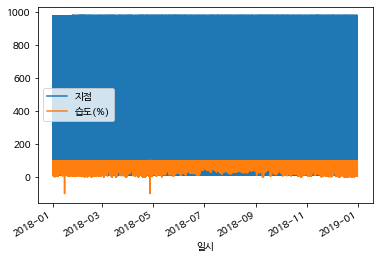

In [ ]:
temp_hum2018.plot()
plt.show()

## 2.2 2018년, 2019년 추이 확인 

### 2.2.1 연도별 평균습도

### 2.2.2 월별 추이

## 2.3 전국 최고 습도, 최저 습도, 평균 습도

In [ ]:
# 카토그램

## 2.4 주요도시별 습도

## 2.5 주요도시별 평균 습도, 최고 습도, 최저 습도

## 2.6 습도와 다른 변수간 상관관계 (주요도시만)

# 3. 연관성 분석

# 3.1 습도와 온라인 구매 데이터 연관성

### 3.1.1 습도와 2018년 상반기 온라인 구매 데이터 연관성

### 3.1.2 습도와 2018년 하반기 온라인 구매 데이터 연관성


### 3.1.3 습도와 2019년 상반기 온라인 구매 데이터 연관성


### 3.1.4 습도와 2019년 하반기 온라인 구매 데이터 연관성

## 3.2 습도와 소셜 데이터 연관성

### 3.2.1 습도와 2018년 상반기 소셜 데이터 연관성

### 3.2.2 습도와 2018년 하반기 소셜 데이터 연관성

### 3.2.3 습도와 2019년 상반기 소셜 데이터 연관성

### 3.2.4 습도와 2019년 하반기 소셜 데이터 연관성